In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv']


In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [4]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
cv = KFold(5, shuffle=True, random_state=0)

In [7]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor()

# baseline model LGB

## cv

In [5]:
for i, (idx_train, idx_cv) in enumerate(cv.split(train)):
    df_train = train.iloc[idx_train]
    df_cv = train.iloc[idx_cv]
    
    x_train = df_train.drop(['target', 'ID_code'], axis = 1)
    y_train = df_train['target']
    
    x_cv = df_cv.drop(['target', 'ID_code'], axis = 1)
    y_cv = df_cv['target']
    
    print('-----------lgb-----------')
    lgb.fit(x_train, y_train)
    print("[K = {}] train auc = {}, cv_rmse = {}".format(i,roc_auc_score(y_train,lgb.predict(x_train)), roc_auc_score(y_cv,lgb.predict(x_cv))))
    


-----------lgb-----------
[K = 0] train auc = 0.9126751258172312, cv_rmse = 0.8516088067354766
-----------lgb-----------
[K = 1] train auc = 0.9132455002585718, cv_rmse = 0.8531589969079622
-----------lgb-----------
[K = 2] train auc = 0.9114728785211965, cv_rmse = 0.8549493031633959
-----------lgb-----------
[K = 3] train auc = 0.9125213708343242, cv_rmse = 0.8557102151868681
-----------lgb-----------
[K = 4] train auc = 0.9120393690142213, cv_rmse = 0.8571553557738807


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

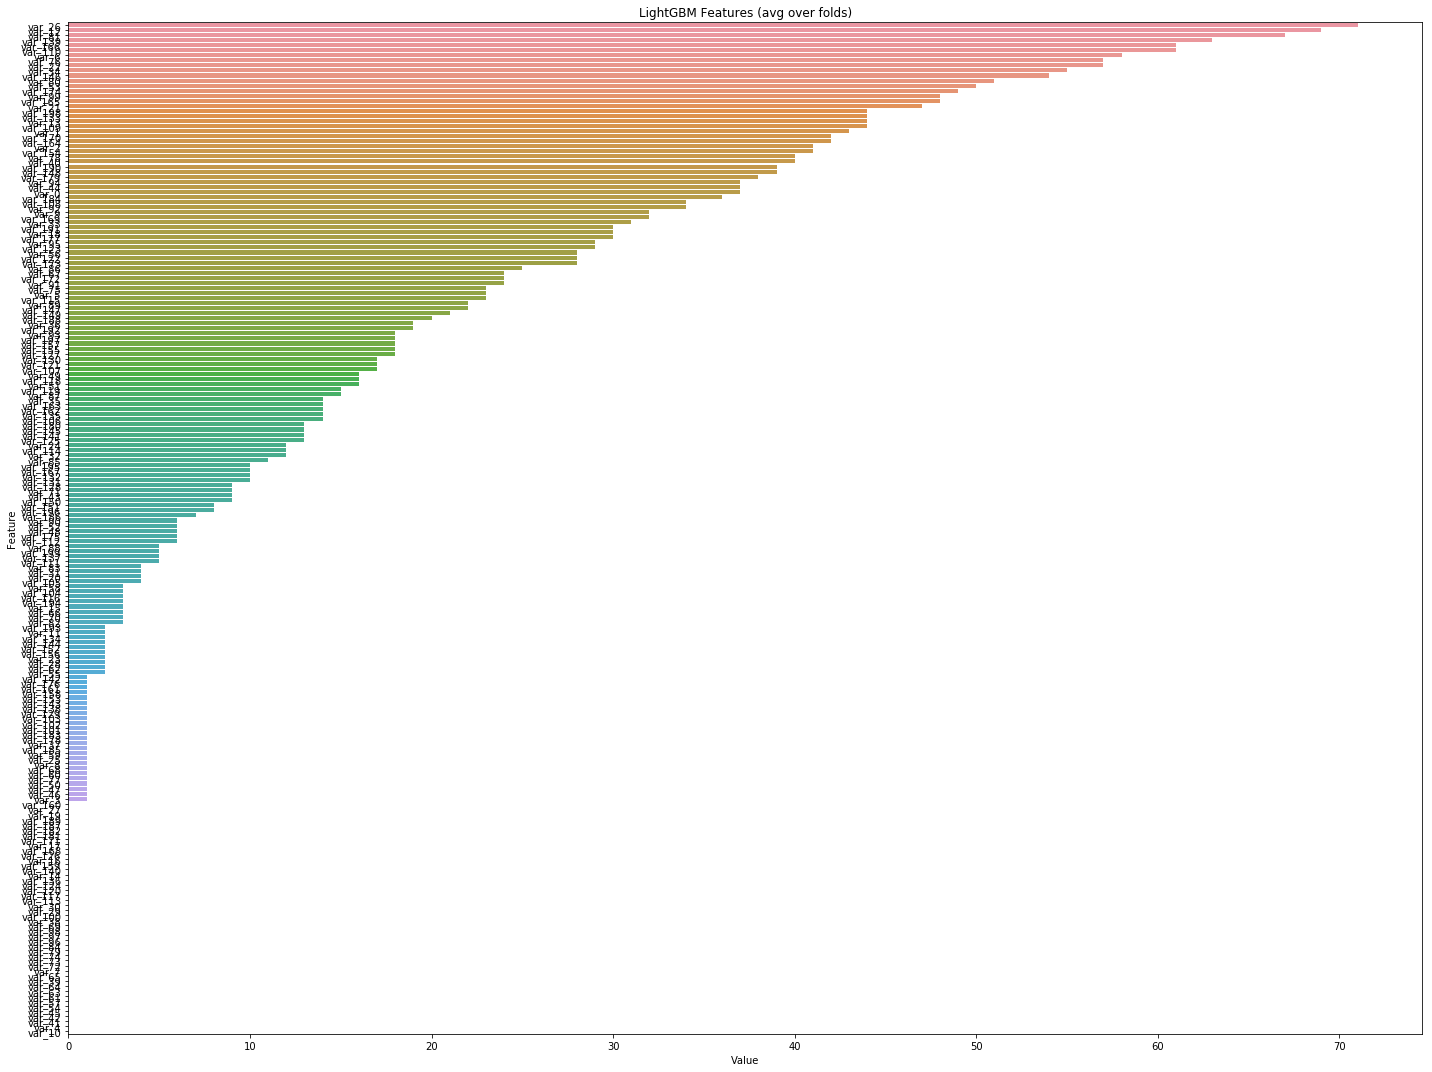

In [7]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_, x_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

## baseline lgb submission

In [8]:
x_train = train.drop(['target', 'ID_code'], axis = 1)
y_train = train['target']
x_test  = test.drop(['ID_code'], axis = 1)
lgb.fit(x_train, y_train)

y_pred = lgb.predict(x_test)

In [9]:
#submission = pd.DataFrame({'ID_code' : test['ID_code'], 'target' : y_pred})
#submission.to_csv('Submission.csv',index=False) - 0.854

## baseline lgb - round data ver

In [10]:
x_train = train.drop(['target', 'ID_code'], axis = 1).round(2)
y_train = train['target'].round(2)
x_test  = test.drop(['ID_code'], axis = 1).round(2)
lgb.fit(x_train, y_train)

y_pred = lgb.predict(x_test)

In [12]:
#submission = pd.DataFrame({'ID_code' : test['ID_code'], 'target' : y_pred})
#submission.to_csv('Submission_190305_round.csv',index=False)

In [13]:
test.shape

(200000, 201)